# 전국 병원 및 요양원 현황

1) 전국 종합 병원 시도별 밀집도

2) 전국 요양원 시도별 밀집도

3) 전국 종합 병원, 요양원 지도 표시

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
df=pd.read_csv("data/2020_hospital_data.csv")

In [3]:
df.head()

,암호화YKIHO코드,요양기관명,종별코드,종별코드명,시도코드,시도명,시군구코드,시군구명,읍면동,우편번호,...,전화번호,병원URL,개설일자,X좌표,Y좌표,의사총수,일반의 의사수,인턴 의사수,레지던트 의사수,전문의 의사수
0,JDQ4MTYyMiM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,가톨릭대학교인천성모병원,1,상급종합병원,220000,인천,220003,인천부평구,NaN,21431,...,032-1544-9004,http://www.cmcism.or.kr/,19810806.0,126.724899,37.484831,317,2,20,63,232
1,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,강북삼성병원,1,상급종합병원,110000,서울,110016,종로구,NaN,3181,...,02-2001-2001,http://www.kbsmc.co.kr,19790324.0,126.967750,37.568408,388,6,30,131,221
2,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,건국대학교병원,1,상급종합병원,110000,서울,110023,광진구,NaN,5030,...,1588-1533,http://www.kuh.ac.kr,19821116.0,127.071828,37.540376,431,4,37,159,231
3,JDQ4MTYyMiM4MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,경북대학교병원,1,상급종합병원,230000,대구,230006,대구중구,NaN,41944,...,200-5114,http://knumc.knu.ac.kr,19100907.0,128.604125,35.866774,508,5,79,199,225
4,JDQ4MTYyMiM4MSMkMSMkNCMkODkkMzgxMzUxIzExIyQxIy...,경상대학교병원,1,상급종합병원,380000,경남,380500,진주시,NaN,52727,...,055-750-8000,http://www.gnuh.co.kr/,19861013.0,128.095672,35.176325,314,1,28,97,188


In [4]:
df=df.drop(["암호화YKIHO코드","전화번호","병원URL","개설일자","일반의 의사수","인턴 의사수","레지던트 의사수","전문의 의사수","우편번호"],axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73097 entries, 0 to 73096
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   요양기관명   73097 non-null  object 
 1   종별코드    73097 non-null  int64  
 2   종별코드명   73097 non-null  object 
 3   시도코드    73097 non-null  int64  
 4   시도명     73097 non-null  object 
 5   시군구코드   73097 non-null  int64  
 6   시군구명    73097 non-null  object 
 7   읍면동     34436 non-null  object 
 8   주소      73097 non-null  object 
 9   X좌표     72875 non-null  float64
 10  Y좌표     72875 non-null  float64
 11  의사총수    73097 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 6.7+ MB


# 요양기관별 dataset 나누기

1) df1: 상급종합병원, 종합병원

2) df2: 보건소, 보건의료원, 보건지소, 보건진료소

3) df3: 요양병원

4) df4: 종합병원, 보건소, 요양병원 개수

5) df5: 음압병실 소유 병원

In [6]:
df1=df[df["종별코드"].isin([1,11])]
df1

,요양기관명,종별코드,종별코드명,시도코드,시도명,시군구코드,시군구명,읍면동,주소,X좌표,Y좌표,의사총수
0,가톨릭대학교인천성모병원,1,상급종합병원,220000,인천,220003,인천부평구,NaN,인천광역시 부평구 동수로 56 (부평동),126.724899,37.484831,317
1,강북삼성병원,1,상급종합병원,110000,서울,110016,종로구,NaN,서울특별시 종로구 새문안로 29 (평동),126.967750,37.568408,388
2,건국대학교병원,1,상급종합병원,110000,서울,110023,광진구,NaN,서울특별시 광진구 능동로 120-1 (화양동),127.071828,37.540376,431
3,경북대학교병원,1,상급종합병원,230000,대구,230006,대구중구,NaN,"대구광역시 중구 동덕로 130 (삼덕동2가, 경북대학교병원)",128.604125,35.866774,508
4,경상대학교병원,1,상급종합병원,380000,경남,380500,진주시,NaN,경상남도 진주시 강남로 79 (칠암동),128.095672,35.176325,314
...,...,...,...,...,...,...,...,...,...,...,...,...
357,홍익병원,11,종합병원,110000,서울,110020,양천구,신정동,서울특별시 양천구 목동로 225 홍익병원본관 (신정동),126.863655,37.528484,67
358,홍천아산병원,11,종합병원,320000,강원,320013,홍천군,NaN,강원도 홍천군 홍천읍 산림공원1길 17 17,127.894854,37.690830,12
359,효산의료재단 안양샘병원,11,종합병원,310000,경기,310701,안양만안구,NaN,"경기도 안양시 만안구 삼덕로 9 (안양동, 안양샘병원)",126.924394,37.393523,109
360,효산의료재단 지샘병원,11,종합병원,310000,경기,311400,군포시,NaN,"경기도 군포시 군포로 591 (당동, (G샘병원)군포샘병원)",126.947316,37.358672,77


In [7]:
# 종합 병원 개수
df1_num=len(df1)
print(df1_num)

362


In [8]:
df2=df[df["종별코드"].isin([71,72,73,75])]
df2

,요양기관명,종별코드,종별코드명,시도코드,시도명,시군구코드,시군구명,읍면동,주소,X좌표,Y좌표,의사총수
54760,가평군보건소,71,보건소,310000,경기,310001,가평군,가평읍,경기도 가평군 가평읍 가화로 155-18 (가평읍),127.510555,37.833513,4
54761,강남구보건소,71,보건소,110000,서울,110001,강남구,삼성동,서울특별시 강남구 선릉로 668 (삼성동),127.042283,37.516393,9
54762,강동구보건소,71,보건소,110000,서울,110002,강동구,NaN,서울특별시 강동구 성내로 45 (성내동),127.125553,37.529311,7
54763,강릉시보건소,71,보건소,320000,강원,320100,강릉시,NaN,강원도 강릉시 남부로17번길 38 (내곡동),128.882832,37.742800,2
54764,강북구보건소,71,보건소,110000,서울,110024,강북구,번동,서울특별시 강북구 한천로 897 (번동),127.038795,37.632359,11
...,...,...,...,...,...,...,...,...,...,...,...,...
58234,청송군보건의료원,75,보건의료원,370000,경북,370023,청송군,청송읍,경상북도 청송군 청송읍 의료원길 19-19 19,129.051834,36.431146,15
58235,청양군보건의료원,75,보건의료원,340000,충남,340014,청양군,NaN,충청남도 청양군 청양읍 칠갑산로7길 54 (),126.804939,36.455020,16
58236,태안군보건의료원,75,보건의료원,340000,충남,340016,태안군,NaN,충청남도 태안군 태안읍 서해로 1952-16 (),126.323197,36.751878,24
58237,평창군보건의료원,75,보건의료원,320000,강원,320012,평창군,NaN,강원도 평창군 평창읍 노성로 11 (),128.390751,37.368944,13


In [9]:
df2_num=len(df2)
print(df2_num)

3479


In [10]:
df2["시도명"].unique()
df2_num=df2["시도명"].value_counts()
print(df2_num)
df2_num[4]

전남     563
경북     559
경남     415
전북     402
충남     401
경기     333
충북     267
강원     245
제주      64
인천      63
서울      33
부산      32
대구      25
울산      24
대전      19
세종시     18
광주      16
Name: 시도명, dtype: int64


401

In [11]:
df2_num1 = pd.DataFrame(df2_num)
df2_num1
df2_num1 = df2_num1.reset_index()
df2_num1.columns = ['시도명', 'counts']
df2_num1

,시도명,counts
0,전남,563
1,경북,559
2,경남,415
3,전북,402
4,충남,401
5,경기,333
6,충북,267
7,강원,245
8,제주,64
9,인천,63


In [12]:
df3=df[df["종별코드"]==28]
df3

,요양기관명,종별코드,종별코드명,시도코드,시도명,시군구코드,시군구명,읍면동,주소,X좌표,Y좌표,의사총수
1874,(의) 예림의료재단 김제요양병원,28,요양병원,350000,전북,350600,김제시,NaN,전라북도 김제시 남북로 202 (요촌동),126.884936,35.802138,4
1875,(의)대선의료재단으뜸요양병원,28,요양병원,310000,경기,311102,안산상록구,본오동,"경기도 안산시 상록구 용신로 352 (본오동, 목화웨딩홀)",126.861151,37.301542,3
1876,(의)동남의료재단동남병원,28,요양병원,380000,경남,380100,김해시,삼계동,경상남도 김해시 가야로51번길 42 (삼계동),128.869237,35.272858,7
1877,(의)동남의료재단동남병원,28,요양병원,380000,경남,380100,김해시,삼계동,경상남도 김해시 가야로51번길 42 (삼계동),128.869237,35.272858,0
1878,(의)백천의료재단 김해제일요양병원,28,요양병원,380000,경남,380100,김해시,NaN,경상남도 김해시 내외중앙로 73 (내동),128.866692,35.236604,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3468,희연요양병원,28,요양병원,380000,경남,380705,창원성산구,NaN,"경상남도 창원시 성산구 원이대로393번길 25 케이프타운 2-4층 일부, 5-6층,...",128.662560,35.239960,14
3469,희윤요양병원,28,요양병원,380000,경남,380900,밀양시,NaN,경상남도 밀양시 부북면 춘화로 60 (),128.745310,35.509519,7
3470,힐락암요양병원,28,요양병원,220000,인천,220004,인천중구,NaN,인천광역시 중구 영종대로 106 (운서동),126.490910,37.494884,4
3471,힐링웰요양병원,28,요양병원,310000,경기,311500,남양주시,NaN,"경기도 남양주시 호평로46번길 14 4~5층 (호평동, ZENEW빌딩)",127.244625,37.654722,4


In [13]:
df3_num=len(df3)
print(df3_num)

1599


In [23]:
# 개수 출력
df4=pd.Series({
    "종합병원":df1_num,
    "보건소":df2_num,
    "요양원":df3_num
})
df4

종합병원                                                  362
보건소     전남     563
경북     559
경남     415
전북     402
충남...
요양원                                                  1599
dtype: object

In [46]:
# 음압병동 데이터 프레임 만들기
df5=df[df["요양기관명"].isin(["국립중앙의료원","서울대학교병원","서울특별시서울의료원","중앙대학교병원","의료법인한전의료재단 한일병원","국군수도병원","의료법인명지의료재단명지병원","분당서울대학교병원","인하대학교의과대학부속병원","의료법인 길의료재단 길병원","강원도강릉의료원","부산광역시의료원","인천광역시의료원","강원대학교병원","세종충남대학교병원","충북대학교병원","단국대학교의과대학부속병원","전북대학교병원","원광대학교병원","전남대학교병원","조선대학교병원","국립목포병원","동국대학교의과대학경주병원","대구의료원","경북대학교병원","학교법인 울산공업학원 울산대학교병원","경상대학교병원","부산대학교병원","제주대학교병원"])]
df5

,요양기관명,종별코드,종별코드명,시도코드,시도명,시군구코드,시군구명,읍면동,주소,X좌표,Y좌표,의사총수
3,경북대학교병원,1,상급종합병원,230000,대구,230006,대구중구,NaN,"대구광역시 중구 동덕로 130 (삼덕동2가, 경북대학교병원)",128.604125,35.866774,508
4,경상대학교병원,1,상급종합병원,380000,경남,380500,진주시,NaN,경상남도 진주시 강남로 79 (칠암동),128.095672,35.176325,314
10,단국대학교의과대학부속병원,1,상급종합병원,340000,충남,340202,천안동남구,NaN,충청남도 천안시 동남구 망향로 201 (안서동),127.172575,36.841590,343
13,부산대학교병원,1,상급종합병원,210000,부산,210006,부산서구,NaN,부산광역시 서구 구덕로 179 (아미동1가),129.018803,35.100848,550
14,분당서울대학교병원,1,상급종합병원,310000,경기,310403,성남분당구,NaN,"경기도 성남시 분당구 구미로173번길 82 (구미동, 분당서울대학교병원)",127.123251,37.351981,751
16,서울대학교병원,1,상급종합병원,110000,서울,110016,종로구,NaN,서울특별시 종로구 대학로 101 (연건동),126.999017,37.579715,1612
24,원광대학교병원,1,상급종합병원,350000,전북,350300,익산시,NaN,전라북도 익산시 무왕로 895 (신동),126.959579,35.964639,289
25,의료법인 길의료재단 길병원,1,상급종합병원,220000,인천,220006,인천남동구,NaN,인천광역시 남동구 남동대로774번길 21-0 의료법인길의료재단길병원,126.709226,37.452171,551
27,인하대학교의과대학부속병원,1,상급종합병원,220000,인천,220004,인천중구,신흥동3가,인천광역시 중구 인항로 27 (신흥동3가),126.634096,37.458679,426
29,전남대학교병원,1,상급종합병원,240000,광주,240001,광주동구,NaN,광주광역시 동구 제봉로 42 (학동),126.921964,35.141921,472


In [36]:
# 종합병원 지역별 밀집도
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'Malgun Gothic'

<Figure size 864x3600 with 0 Axes>

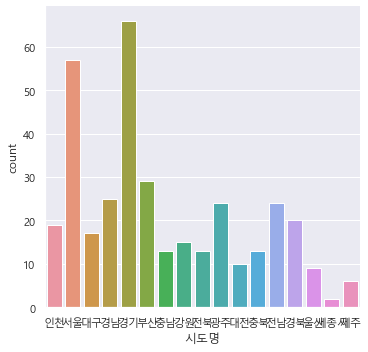

In [37]:
plt.figure(figsize=(12, 50))
sns.catplot(data=df1,x="시도명",kind="count")

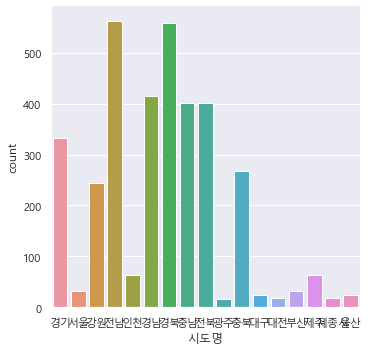

In [38]:
# 보건소 밀집도
sns.catplot(data=df2,x="시도명",kind="count")

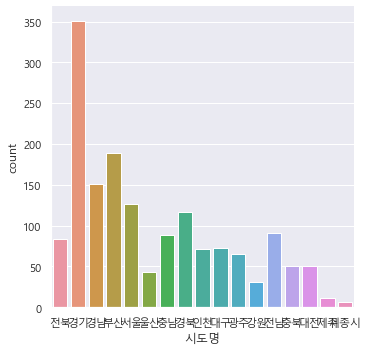

In [39]:
# 요양원 밀집도
sns.catplot(data=df3,x="시도명",kind="count")

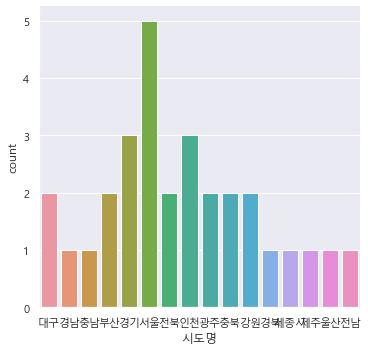

In [40]:
# 음압병동 밀집도
sns.catplot(data=df5,x="시도명",kind="count")

# 지도 시각화
1) map_osm1=종합 병원 위치 표시

2) map_osm2=보건소 위치 표시

3) map_osm3=요양원 위치 표시

In [41]:
import folium

In [18]:
map_osm1= folium.Map(location=[37.566647,126.978426])
map_osm1

In [19]:
for i in range(0,len(df1)):
    x=df1.loc[i,"X좌표"]
    y=df1.loc[i,"Y좌표"]
    try: # y좌표가 위도임...x좌표가 경도라고오
        marker1 = folium.Marker([y,x],icon=folium.Icon(color='red'))
        marker1.add_to(map_osm1)
    except:
        continue
        
map_osm1


In [52]:
df2_num1["x좌표"]=[34.988560,36.915393,35.463240,35.735203,36.555894,37.239623,36.702182,37.861203,33.445559,37.491168,
                37.544721, 35.182330, 35.829581,35.551914, 36.337627,36.599418,35.162677]
df2_num1["y좌표"]=[126.958681, 128.889106
, 128.159576
, 127.127586
, 126.807376
, 127.216028
, 127.637123
, 128.203087
, 126.500047
, 126.704551
, 126.980941
, 129.069042
, 128.562568
, 129.241625
, 127.386728
, 127.255221
, 126.832157]
# 전남     563  34.988560, 126.958681
# 경북     559  36.915393, 128.889106
# 경남     415  35.463240, 128.159576
# 전북     402  35.735203, 127.127586
# 충남     401  36.555894, 126.807376
# 경기     333  37.239623, 127.216028
# 충북     267  36.702182, 127.637123
# 강원     245  37.861203, 128.203087
# 제주      64  33.445559, 126.500047
# 인천      63  37.491168, 126.704551
# 서울      33  37.544721, 126.980941
# 부산      32  35.182330, 129.069042
# 대구      25 35.829581, 128.562568
# 울산      24  35.551914, 129.241625
# 대전      19  36.337627, 127.386728
# 세종시    18  36.599418, 127.255221
# 광주        35.162677, 126.832157
df2_num1
i=0
x=df2_num1.loc[i,"x좌표"]
y=df2_num1.loc[i,"y좌표"]
counts=df2_num1.loc[i,"counts"]
print(x,y,counts)

34.98856 126.958681 563


In [59]:
# popup --> 지점에 이름을 표시
# 각 지역별 보건소의 개수 count하고 개수에 비례하게 원형 마커의 크기를 키우기. 원형마커의 중심점은 해당 지역의 중심지.
map_osm3 = folium.Map(location=[37.502549, 127.024867])

for i in range(0,len(df2_num1)):
    x=df2_num1.loc[i,"x좌표"]
    y=df2_num1.loc[i,"y좌표"]
    counts=df2_num1.loc[i,"counts"]
    city=df2_num1.loc[i,"시도명"]
    ran=int(0.1*counts)
    try: 
        marker3 = folium.CircleMarker(location=[x,y],radius=ran,color='#3186cc',fill_color='#3186cc',popup=city)
        marker3.add_to(map_osm3)
    except:
        continue
        

map_osm3

In [49]:
map_osm4= folium.Map(location=[37.566647,126.978426])
for i in df5.index:
    x=df5.loc[i,"X좌표"]
    y=df5.loc[i,"Y좌표"]
    try: # y좌표가 위도임...x좌표가 경도라고오
        marker1 = folium.Marker([y,x],icon=folium.Icon(color='red'))
        marker1.add_to(map_osm4)
    except:
        continue
        
map_osm4